In [4]:
import os
from PIL import Image, UnidentifiedImageError
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    """
    Load an image, resize it, and normalize pixel values
    """
    img = Image.open(image_path).convert('RGB')  # Ensure image is in RGB
    img = img.resize(target_size, Image.LANCZOS)  # High-quality resizing
    img_array = np.asarray(img) / 255.0  # Normalize to [0, 1]
    return img_array

def preprocess_images_in_directory(input_dir, output_dir, target_size=(224, 224)):
   
    num_processed = 0
    num_skipped = 0

    # Define allowed image extensions
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}

    for root, dirs, files in os.walk(input_dir):
        rel_path = os.path.relpath(root, input_dir)
        current_output_dir = os.path.join(output_dir, rel_path)
        os.makedirs(current_output_dir, exist_ok=True)

        for filename in files:
            file_ext = os.path.splitext(filename)[1].lower()
            if file_ext in valid_extensions:
                input_file_path = os.path.join(root, filename)
                output_file_path = os.path.join(current_output_dir, filename)
                try:
                    processed_img = preprocess_image(input_file_path, target_size)
                    # Convert back to uint8
                    img_to_save = (processed_img * 255).astype(np.uint8)
                    Image.fromarray(img_to_save).save(output_file_path)
                    num_processed += 1
                    if num_processed % 100 == 0:
                        print(f"Processed {num_processed} images...")
                except UnidentifiedImageError:
                    print(f"UnidentifiedImageError: Skipping file (not a valid image): {input_file_path}")
                    num_skipped += 1
                except Exception as e:
                    print(f"Error processing {input_file_path}: {e}")
                    num_skipped += 1

    print(f"\nPreprocessing completed.")
    print(f"Total images processed and saved: {num_processed}")
    print(f"Total images skipped: {num_skipped}")

if __name__ == "__main__":
    
    input_dir = r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images" 
    output_dir = r"C:\Users\mema8\Downloads\Output-images" 

    # Verify that input directory exists
    if not os.path.exists(input_dir):
        print(f"Input directory does not exist: {input_dir}")
    else:
        preprocess_images_in_directory(input_dir, output_dir, target_size=(224, 224))



Preprocessing completed.
Total images processed and saved: 85
Total images skipped: 0


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


VGG-16 

In [ ]:
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

img_height, img_width = 224, 224 
batch_size = 32

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output_layer)


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

datagen = ImageDataGenerator(rescale=1.0/255.0)

data_generator = datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 85 images belonging to 2 classes.


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,  
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML training", 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 53 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML validation",  
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 7 images belonging to 2 classes.


In [ ]:

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML Testing", 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 40 images belonging to 2 classes.


In [ ]:

epochs = 4
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/4


C:\Users\mema8\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.3125 - loss: 0.9980 - val_accuracy: 0.5714 - val_loss: 4.9508
Epoch 2/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 3.9194 - val_accuracy: 0.5714 - val_loss: 5.2417
Epoch 3/4


C:\Users\mema8\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5714 - val_loss: 5.0997
Epoch 4/4
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8571 - loss: 1.5084 - val_accuracy: 0.5714 - val_loss: 4.6452
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5312 - loss: 5.2787
Test Loss: 5.278685092926025
Test Accuracy: 0.53125


#
visualization


Found 35 malignant images.
Found 50 benign images.


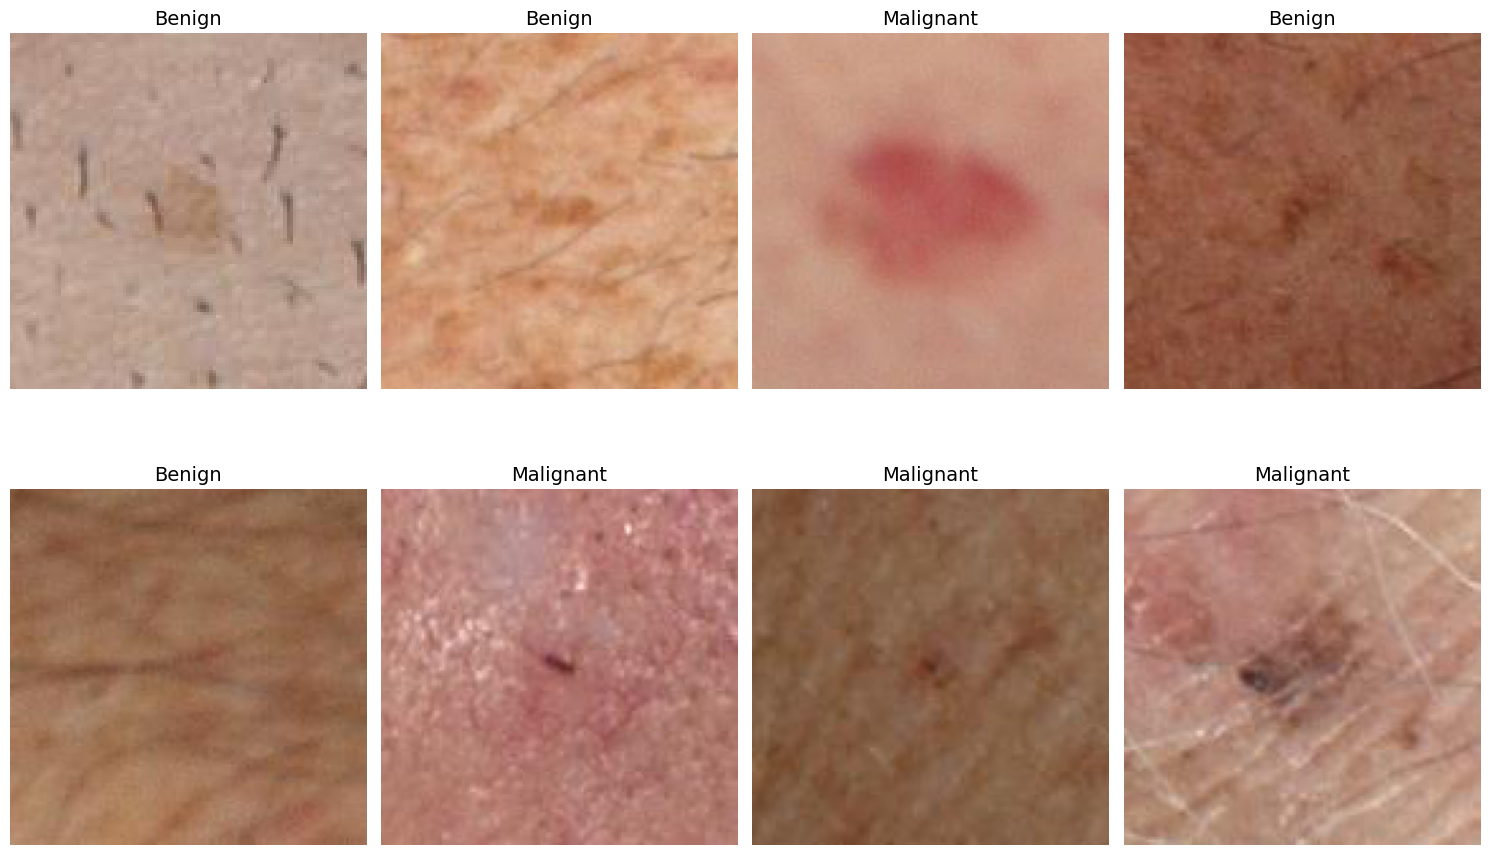

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


folder_path = r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images"

malignant_folder = os.path.join(folder_path, 'malignant')
benign_folder = os.path.join(folder_path, 'benign')

try:
    malignant_files = os.listdir(malignant_folder)
    benign_files = os.listdir(benign_folder)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit(1)

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
malignant_images = [file for file in malignant_files if file.lower().endswith(valid_extensions)]
benign_images = [file for file in benign_files if file.lower().endswith(valid_extensions)]


print(f"Found {len(malignant_images)} malignant images.")
print(f"Found {len(benign_images)} benign images.")

num_per_category = min(4, len(malignant_images), len(benign_images))

# Select a subset of images from each category
selected_malignant = random.sample(malignant_images, num_per_category) if len(malignant_images) >= num_per_category else malignant_images
selected_benign = random.sample(benign_images, num_per_category) if len(benign_images) >= num_per_category else benign_images

# Combine images into a single list with labels (0 for benign, 1 for malignant)
images = []
labels = []  # 0 for benign, 1 for malignant

for img in selected_malignant:
    images.append(os.path.join(malignant_folder, img))
    labels.append(1)  # Malignant is labeled as 1

for img in selected_benign:
    images.append(os.path.join(benign_folder, img))
    labels.append(0)  # Benign is labeled as 0

# Shuffle the combined list to mix benign and malignant images
combined = list(zip(images, labels))
random.shuffle(combined)
images, labels = zip(*combined)


num_images = len(images)

# Determine the grid size based on the number of images
cols = 4
rows = (num_images + cols - 1) // cols  

# Create a subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the 2D grid to 1D for easy iteration

# Loop through and display the images
for i in range(num_images):
    image_path = images[i]
    try:
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        title = "Malignant" if labels[i] == 1 else "Benign"
        axes[i].set_title(title, fontsize=14)
    except Exception as e:
        axes[i].axis('off')
        axes[i].set_title("Error loading image", fontsize=14)
        print(f"Error loading {image_path}: {e}")


for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()



In [14]:
pip install pandas matplotlib openpyxl

Note: you may need to restart the kernel to use updated packages.


In [15]:

import pandas as pd
df = pd.read_csv('metadata.csv', index_col=0)
df.info()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 217477 entries, ISIC_0015670 to ISIC_9999967
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   patient_id                   217477 non-null  object 
 1   age_approx                   216272 non-null  float64
 2   sex                          215158 non-null  object 
 3   anatom_site_general          213981 non-null  object 
 4   clin_size_long_diam_mm       217477 non-null  float64
 5   image_type                   217477 non-null  object 
 6   tbp_tile_type                217477 non-null  object 
 7   tbp_lv_A                     217477 non-null  float64
 8   tbp_lv_Aext                  217477 non-null  float64
 9   tbp_lv_B                     217477 non-null  float64
 10  tbp_lv_Bext                  217477 non-null  float64
 11  tbp_lv_C                     217477 non-null  float64
 12  tbp_lv_Cext                  217477 non-null  

In [16]:
print(df.columns)


Index(['patient_id', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z'],
      dtype='object')


Index(['patient_id', 'age_approx', 'sex', 'anatom_site_general',
       'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A',
       'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext',
       'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
       'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA',
       'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB',
       'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location',
       'tbp_lv_location_simple', 'tbp_lv_minorAxisMM',
       'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color',
       'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL',
       'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle',
       'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z'],
      dtype='object')
              age_approx anatom_site_general
isic_id                                     
ISIC_0015670        60.0     lower extremity
ISIC_0015845      

C:\Users\mema8\AppData\Local\Temp\ipykernel_47500\3826674431.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='age_approx', y='anatom_site_general', data=df, palette='muted')


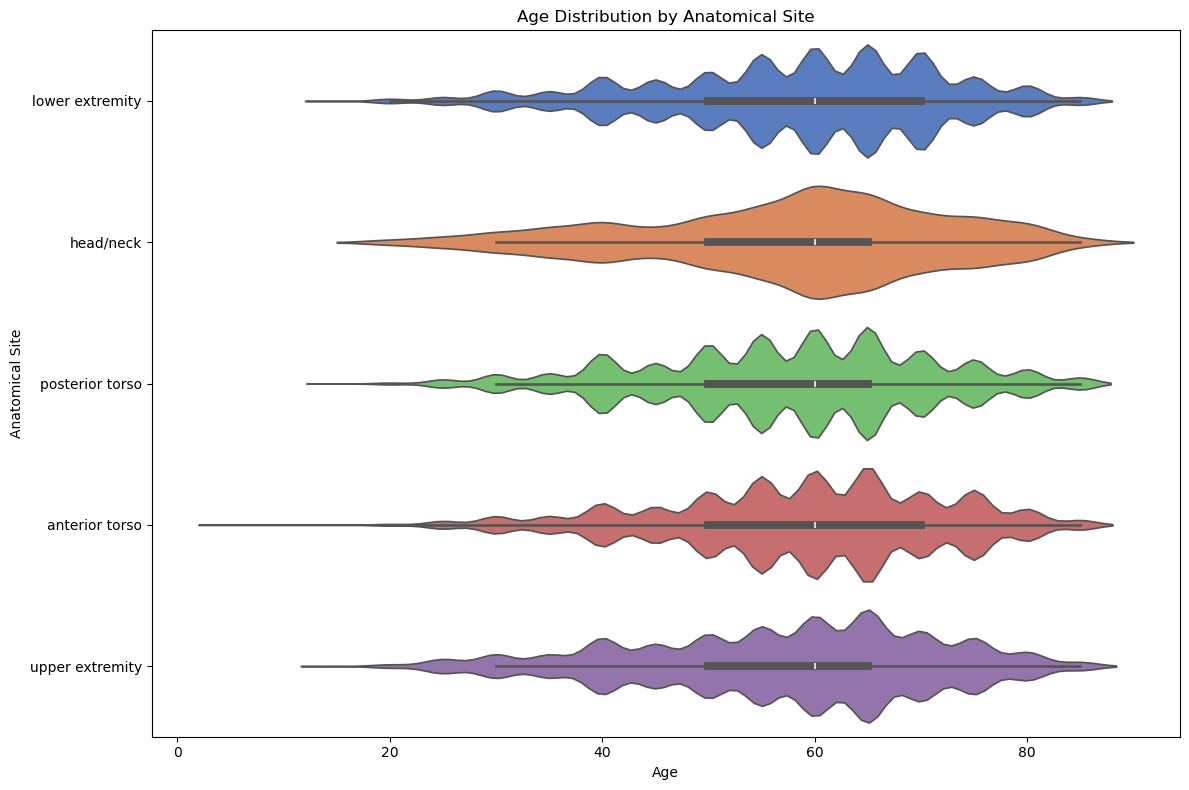

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('metadata.csv', index_col=0)

#
print(df.columns)
print(df[['age_approx', 'anatom_site_general']].head())


df = df.dropna(subset=['age_approx', 'anatom_site_general'])

# Violin Plot: Age vs Anatomical Site
plt.figure(figsize=(12, 8))
sns.violinplot(x='age_approx', y='anatom_site_general', data=df, palette='muted')
plt.title('Age Distribution by Anatomical Site')
plt.xlabel('Age')
plt.ylabel('Anatomical Site')
plt.tight_layout()
plt.show()



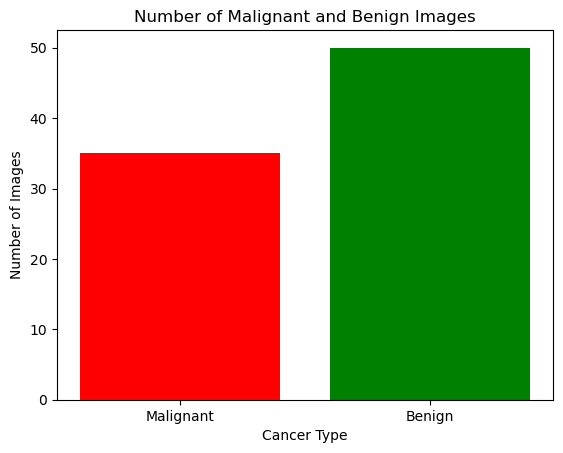

Found 35 malignant images.
Found 50 benign images.


In [24]:
import os
import matplotlib.pyplot as plt

# folder containing subfolders (malignant and benign)
folder_path = r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images"

# Define the subfolders for each category
malignant_folder = os.path.join(folder_path, 'malignant')
benign_folder = os.path.join(folder_path, 'benign')

malignant_files = os.listdir(malignant_folder)
benign_files = os.listdir(benign_folder)

malignant_images = [file for file in malignant_files if file.endswith(('jpg', 'png', 'jpeg'))]
benign_images = [file for file in benign_files if file.endswith(('jpg', 'png', 'jpeg'))]

# Count the number of images in each category
malignant_count = len(malignant_images)
benign_count = len(benign_images)

categories = ['Malignant', 'Benign']
counts = [malignant_count, benign_count]

plt.bar(categories, counts, color=['red', 'green'])


plt.xlabel('Cancer Type')
plt.ylabel('Number of Images')
plt.title('Number of Malignant and Benign Images')

plt.show()

print(f"Found {malignant_count} malignant images.")
print(f"Found {benign_count} benign images.")


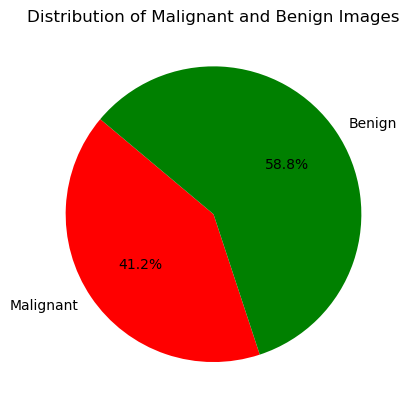

Found 35 malignant images.
Found 50 benign images.


In [26]:
import os
import matplotlib.pyplot as plt

#  folder containing subfolders (malignant and benign)
folder_path = r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images"

# Define the subfolders for each category
malignant_folder = os.path.join(folder_path, 'malignant')
benign_folder = os.path.join(folder_path, 'benign')


malignant_files = os.listdir(malignant_folder)
benign_files = os.listdir(benign_folder)

# Filter only image files 
malignant_images = [file for file in malignant_files if file.endswith(('jpg', 'png', 'jpeg'))]
benign_images = [file for file in benign_files if file.endswith(('jpg', 'png', 'jpeg'))]

malignant_count = len(malignant_images)
benign_count = len(benign_images)

# Plot the pie chart
categories = ['Malignant', 'Benign']
counts = [malignant_count, benign_count]
colors = ['red', 'green']

plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Distribution of Malignant and Benign Images')

plt.show()

print(f"Found {malignant_count} malignant images.")
print(f"Found {benign_count} benign images.")


CNN


In [61]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  image parameters
img_height, img_width = 128, 128  
batch_size = 32

# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)


data_generator = datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML all images" , 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

# Get the labels and their mappings
labels = data_generator.class_indices  
print("Class labels (folder names to numeric mapping):", labels)


# Extract actual labels for all files
filepaths = data_generator.filenames
file_labels = data_generator.classes  #


for filepath, label in zip(filepaths, file_labels):
    print(f"File: {filepath} -> Label: {label}")


Found 85 images belonging to 2 classes.
Class labels (folder names to numeric mapping): {'benign': 0, 'malignant': 1}
File: benign\ISIC_0015670.jpg -> Label: 0
File: benign\ISIC_0015845.jpg -> Label: 0
File: benign\ISIC_0015864.jpg -> Label: 0
File: benign\ISIC_0015902.jpg -> Label: 0
File: benign\ISIC_0024200.jpg -> Label: 0
File: benign\ISIC_0035502.jpg -> Label: 0
File: benign\ISIC_0051648.jpg -> Label: 0
File: benign\ISIC_0051710.jpg -> Label: 0
File: benign\ISIC_0051822.jpg -> Label: 0
File: benign\ISIC_0051897.jpg -> Label: 0
File: benign\ISIC_0051958.jpg -> Label: 0
File: benign\ISIC_0052003.jpg -> Label: 0
File: benign\ISIC_0052004.jpg -> Label: 0
File: benign\ISIC_0052026.jpg -> Label: 0
File: benign\ISIC_0052042.jpg -> Label: 0
File: benign\ISIC_0052068.jpg -> Label: 0
File: benign\ISIC_0052109.jpg -> Label: 0
File: benign\ISIC_0052213.jpg -> Label: 0
File: benign\ISIC_0052220.jpg -> Label: 0
File: benign\ISIC_0052259.jpg -> Label: 0
File: benign\ISIC_0052270.jpg -> Label: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))  


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\mema8\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML training",       
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML validation",  
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


epochs = 10
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Found 103 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Epoch 1/10


C:\Users\mema8\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.5704 - loss: 0.6885 - val_accuracy: 0.4375 - val_loss: 0.6920
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4688 - loss: 0.7037 - val_accuracy: 1.0000 - val_loss: 0.6156
Epoch 3/10


C:\Users\mema8\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5439 - loss: 0.6883
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5938 - loss: 0.6749 - val_accuracy: 0.7500 - val_loss: 0.6496
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.5651 - loss: 0.6615 - val_accuracy: 0.0000e+00 - val_loss: 1.1792
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4286 - loss: 0.8101
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.5964 - loss: 0.6350 - val_accuracy: 0.7500 - val_loss: 0.5862
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5714 - loss: 0.6793 - val_accuracy: 0.6667 - val_loss: 0.6856
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6294 - loss: 0.6428
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 0.5873 - val_accuracy: 0.7500 - val_loss: 0.5659


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\mema8\OneDrive\سطح المكتب\ML project\ML training", 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc}')

Found 103 images belonging to 2 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8034 - loss: 0.5707
Test Accuracy: 0.8020833134651184


C:\Users\mema8\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
